In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob
import cv2
import numpy as np

In [10]:
a = 'loveyofffffffffu'
a[14:]

'fu'

In [4]:
x_files =  glob.glob('..\\set_images\\*.png')
x_file = x_files[4]
x_files

['..\\set_images\\A1_plant001_rgb.png',
 '..\\set_images\\A1_plant002_rgb.png',
 '..\\set_images\\A1_plant153_rgb.png',
 '..\\set_images\\A1_plant154_rgb.png',
 '..\\set_images\\A1_plant161_rgb.png',
 '..\\set_images\\A2_plant001_rgb.png',
 '..\\set_images\\A2_plant002_rgb.png',
 '..\\set_images\\A2_plant003_rgb.png',
 '..\\set_images\\A3_plant004_rgb.png',
 '..\\set_images\\A3_plant006_rgb.png',
 '..\\set_images\\A3_plant012_rgb.png']

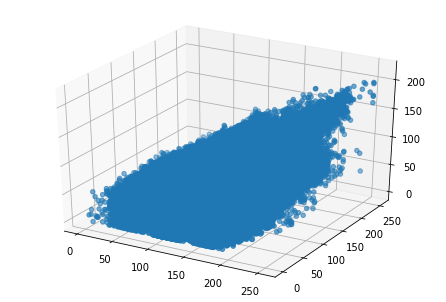

In [28]:
img = cv2.imread(x_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = np.clip(g.flatten()*3,0,255)
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter(r, g, b)
plt.show()

In [29]:
img = cv2.imread(x_file)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#HSV
r, g, b = cv2.split(img)
r = r.flatten()
g = np.clip(g.flatten()*3,0,255)
b = b.flatten()#plotting 

# vectorized = np.array([r,g,b]).reshape((-1,3))
vectorized = np.array([r,g,b])
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [33]:
K = 2
attempts=20
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

In [34]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

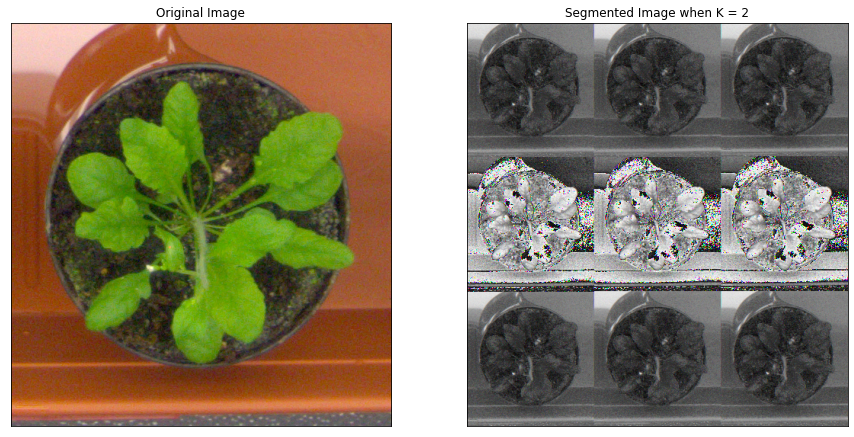

In [35]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()